In [9]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import math
import nsfg
import first
import thinkstats2
import thinkplot
import scipy.stats

Chapter 2 Exercise 4

In [10]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]



In [11]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [12]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [13]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    

-0.088672927072602

Chapter 3 Exercise 1

In [14]:
resp = nsfg.ReadFemResp()
pmf = thinkstats2.Pmf(d, label='actual')
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

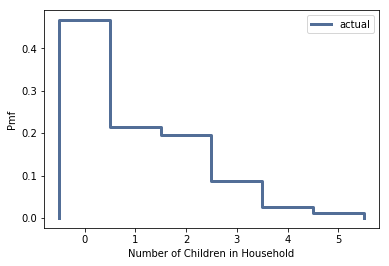

In [15]:
d = thinkstats2.Hist(resp.numkdhh, label='num_kids')
pmf = thinkstats2.Pmf(d, label='actual')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of Children in Household', ylabel='Pmf')

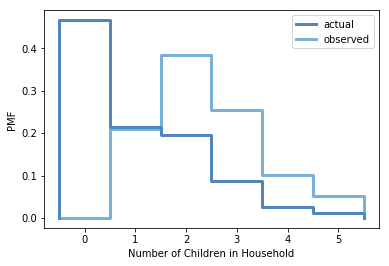

In [16]:
biased = thinkstats2.Hist({1:d[1], 2:d[2], 3:d[3], 4:d[4], 5:d[5]}, 'num_kids')

biasedpmf = thinkstats2.Pmf(biased, label='biased')
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Number of Children in Household', ylabel='PMF')

Chapter 4 Exercise 2

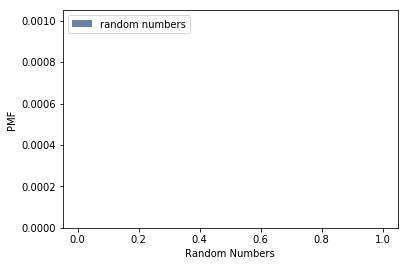

In [17]:
randomlist = []
for i in range(0,1000):
    randomlist.append(np.random.random())
pmf = thinkstats2.Pmf(randomlist, 'random numbers')
thinkplot.PrePlot()
thinkplot.Hist(pmf)

thinkplot.Config(xlabel='Random Numbers', ylabel='PMF')

Nothing goes wrong here, the issue is that the data is approximately continuous, so any one value will have a probability close to zero.

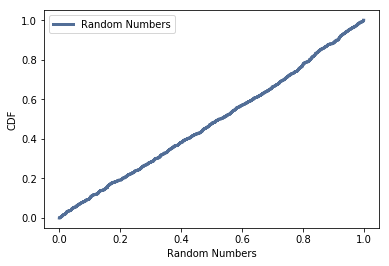

In [18]:
first_cdf = thinkstats2.Cdf(randomlist, label='Random Numbers')
thinkplot.PrePlot()
thinkplot.Cdf(first_cdf)
thinkplot.Config(xlabel='Random Numbers', ylabel='CDF')

Yes, the distribution is uniform.

Chapter 5 Exercise 1

In [19]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)


In [20]:
def height_conv_to_metric(inches):
    return (inches * 2.54)
a = height_conv_to_metric(70)
b = height_conv_to_metric(73)
print(a,b, dist.mean(), dist.std())

177.8 185.42000000000002 178.0 7.7


In [21]:
eval_b = scipy.stats.norm.cdf(b, loc=dist.mean(), scale=dist.std()) 
eval_a = scipy.stats.norm.cdf(a, loc=dist.mean(), scale=dist.std())  
percentage = round(100 * (eval_b - eval_a), 2)
print("%" + str(percentage))



%34.27


Question 5

In [22]:
x = 1/125
y = 1/300
y/(x+y)

0.29411764705882354

Question 6

Frequentists believe that only repeatable random events (like the result of flipping a coin) have probabilities. Frequentists don't attach probabilities to hypotheses. Bayesians believe it is perfectly acceptable to attach probabilities to non-repeatable events.